# Instalações e importações

In [1]:
import numpy as np
np.__version__

'1.26.4'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.9.2'

In [3]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
sklearn.__version__

'1.5.1'

In [4]:
import scipy
scipy.__version__

'1.14.1'

In [5]:
def plot_vectors(arrays, transformation_matrix):
    plt.figure(figsize=(5, 5))
    plt.axhline(y=0, linestyle='--')
    plt.axvline(x=0, linestyle='--')
    plt.xticks(np.arange(-10, 10, 0.5))
    plt.yticks(np.arange(-10, 10, 0.5))
    color_palete = [('blue', 'orange'), ('green', 'brown')]
    for i, array in enumerate(arrays):
        array_transformed = np.matmul(transformation_matrix, array)
        plt.arrow(0, 0, *array, length_includes_head=True, head_width=0.05, color=color_palete[i][0], label=f'array_{i+1}')
        plt.arrow(0, 0, *array_transformed, length_includes_head=True, head_width=0.05, color=color_palete[i][1], label=f'array_{i+1}_transformed')
    plt.legend()

# Transformações

## Matrizes de espelhamento

In [9]:
A = np.array([[-1, 0],
              [ 0, 1]])

In [10]:
B = np.array([[1,  0],
              [0, -1]])

In [11]:
array_1 = np.array([1, 2])
array_2 = np.array([3, 4])

In [12]:
array_1_transformed = np.matmul(A, array_1)
array_1_transformed

array([-1,  2])

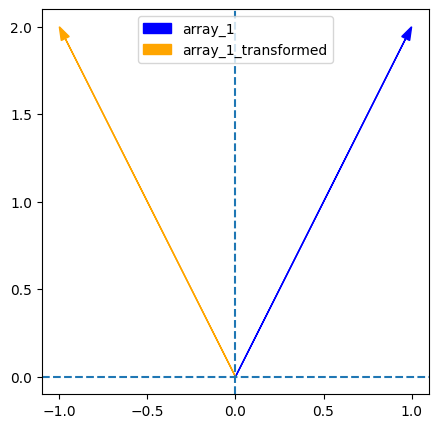

In [13]:
plot_vectors([array_1], A)

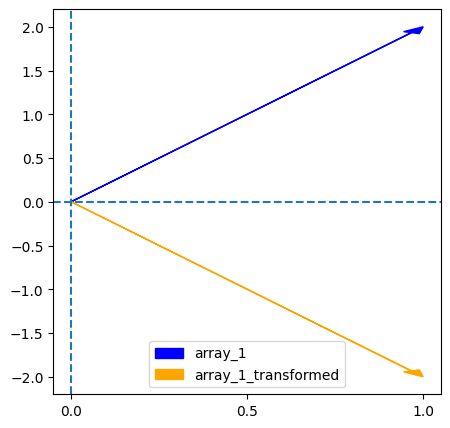

In [14]:
plot_vectors([array_1], B)

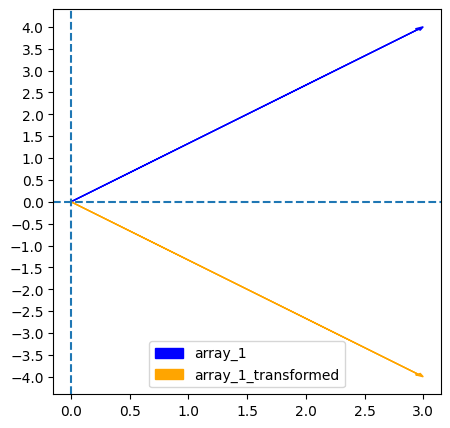

In [15]:
plot_vectors([array_2], B)

## Matrizes de escalonamento

In [16]:
C = np.array([[3, 0],
              [0, 3]])

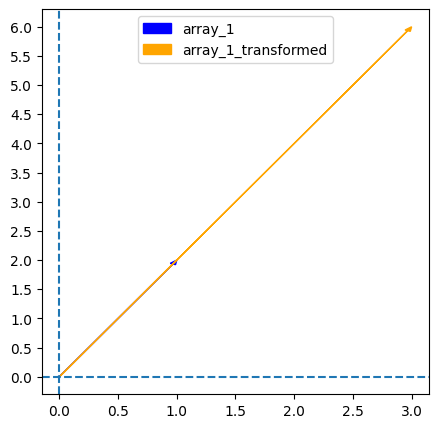

In [17]:
plot_vectors([array_1], C)

## Matrizes de cisalhamento

In [18]:
D = np.array([[1,   0],
              [0, 2.5]])

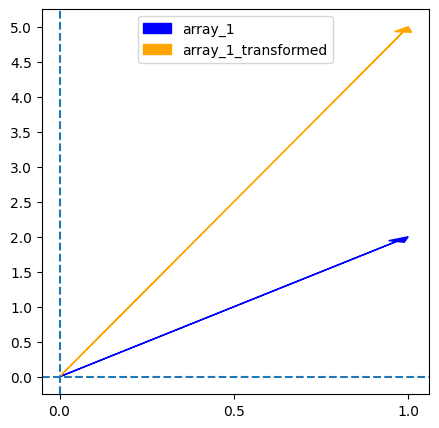

In [19]:
plot_vectors([array_1], D)

## Matrizes de rotação

In [20]:
degrees = 10
E = np.array([[np.cos(np.deg2rad(degrees)), -np.sin(np.deg2rad(degrees))],
              [np.sin(np.deg2rad(degrees)),  np.cos(np.deg2rad(degrees))]])
E

array([[ 0.98480775, -0.17364818],
       [ 0.17364818,  0.98480775]])

In [21]:
array_1_transformed = np.matmul(E, array_1)

In [22]:
array_1

array([1, 2])

In [23]:
array_1_transformed

array([0.6375114 , 2.14326368])

In [24]:
np.linalg.norm(array_1), np.linalg.norm(array_1_transformed)

(2.23606797749979, 2.2360679774997894)

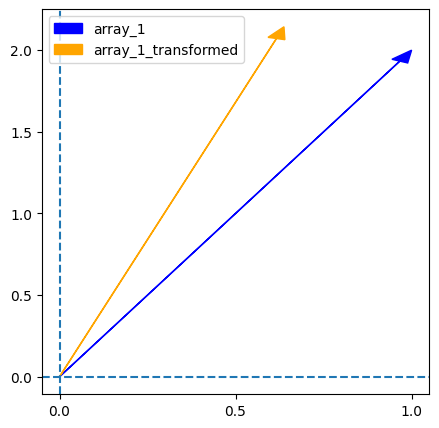

In [25]:
plot_vectors([array_1], E)

## Transformações e determinantes

In [26]:
array_1 = [3, 0]
array_2 = [0, 3]

A = np.array([[0.8, 0.3],
              [0.1, 0.7]])

In [27]:
array_1_transformed = np.matmul(A, array_1)
array_2_transformed = np.matmul(A, array_2)

In [28]:
array_1_transformed, array_2_transformed

(array([2.4, 0.3]), array([0.9, 2.1]))

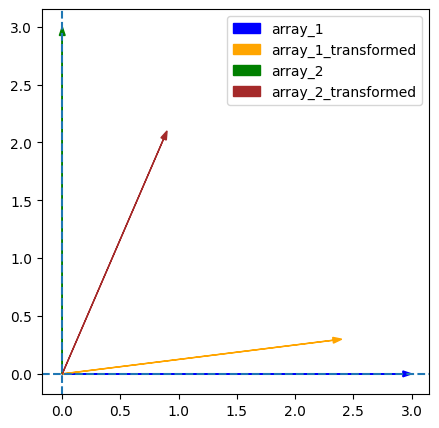

In [29]:
plot_vectors([array_1, array_2], A)

In [30]:
area = np.linalg.norm(np.cross(array_1, array_2))
area

9.0

In [31]:
area_transformed = np.linalg.norm(np.cross(array_1_transformed, array_2_transformed))
area_transformed

4.77

In [32]:
det  = np.linalg.det(A)
det

0.53

In [33]:
area * det

4.7700000000000005

## Transformações e matrizes inversas

In [34]:
array = np.array([3, 5, -2])
A = np.array([[3,  2,  1],
              [0,  4, -1],
              [7, -3,  0]])

In [35]:
array_transformed = np.matmul(A, array)
array_transformed

array([17, 22,  6])

In [36]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.05882353,  0.05882353,  0.11764706],
       [ 0.1372549 ,  0.1372549 , -0.05882353],
       [ 0.54901961, -0.45098039, -0.23529412]])

In [37]:
array_detransformed = np.matmul(A_inv, array_transformed)
array_detransformed

array([ 3.,  5., -2.])

## Transformações e sistemas lineares

In [38]:
prices = np.array([7.5, 8.25, 35.8, 15])
consumption = np.array([[1, 1, 2, 2],
                        [2, 2, 2, 1],
                        [2, 1, 2, 2],
                        [2, 1, 2, 1]])

In [39]:
bill = np.matmul(consumption, prices)
bill

array([117.35, 118.1 , 124.85, 109.85])

## Eigenvectors e eigenvalues

In [40]:
A = np.array([[3,  2],
              [7, -1]])

In [41]:
np.linalg.eig(A)

EigResult(eigenvalues=array([ 5.24264069, -3.24264069]), eigenvectors=array([[ 0.66557907, -0.30510159],
       [ 0.74632735,  0.95231981]]))

In [42]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues, eigenvectors

(array([ 5.24264069, -3.24264069]),
 array([[ 0.66557907, -0.30510159],
        [ 0.74632735,  0.95231981]]))

In [43]:
eigenvectors = eigenvectors.T
eigenvectors

array([[ 0.66557907,  0.74632735],
       [-0.30510159,  0.95231981]])

In [44]:
eigenvector_1, eigenvector_2 = eigenvectors
eigenvector_1, eigenvector_2

(array([0.66557907, 0.74632735]), array([-0.30510159,  0.95231981]))

In [45]:
eigenvalue_1, eigenvalue_2 = eigenvalues
eigenvalue_1, eigenvalue_2

(5.242640687119285, -3.242640687119285)

In [46]:
eigenvector_1_transformed = np.matmul(A, eigenvector_1)
eigenvector_2_transformed = np.matmul(A, eigenvector_2)
eigenvector_1_transformed, eigenvector_2_transformed

(array([3.48939189, 3.91272611]), array([ 0.98933484, -3.08803096]))

In [47]:
eigenvalue_1 * eigenvector_1, eigenvalue_2 * eigenvector_2

(array([3.48939189, 3.91272611]), array([ 0.98933484, -3.08803096]))

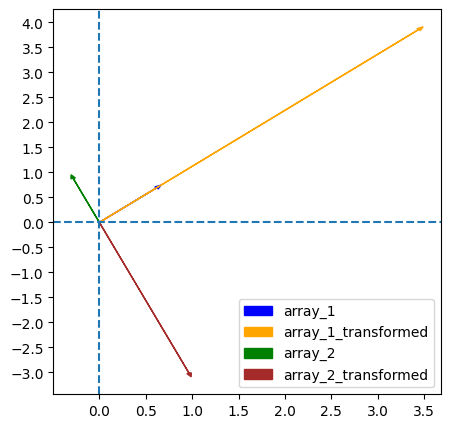

In [48]:
plot_vectors([eigenvector_1, eigenvector_2], A)

### Eigenvectors de matrizes singulares

In [49]:
A = np.array([[1, 3, 2,  5],
              [3, 2, 8,  1],
              [2, 6, 4, 10],
              [5, 1, 7,  4]])

In [50]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [51]:
eigenvalues

array([ 1.69734705e+01, -7.73331944e+00, -6.63578077e-16,  1.75984889e+00])

### Eigenvectors de matrizes simétricas

In [52]:
A = np.array([[ 3,-1, 2, 0],
              [-1, 4, 7, 1],
              [ 2, 7, 5, 2],
              [ 0, 1, 2, 0]])

In [53]:
scipy.linalg.issymmetric(A)

True

In [54]:
eigenvalues, eigenvectors = np.linalg.eigh(A)
eigenvectors = eigenvectors.T
eigenvectors

array([[ 3.11071755e-01,  6.47487155e-01, -6.65307573e-01,
         2.03373011e-01],
       [-8.26676362e-02, -2.56277647e-01,  6.31961708e-03,
         9.63040961e-01],
       [-9.42474501e-01,  2.98668313e-01, -1.50129486e-01,
        -4.37536981e-04],
       [-9.02343642e-02, -6.52594354e-01, -7.31291346e-01,
        -1.76610687e-01]])

In [55]:
for i, _ in enumerate(eigenvectors):
  for j, _ in enumerate(eigenvectors[i + 1:], start = i + 1):
    print(f'eigenvector_{i+1} norm:', np.linalg.norm(eigenvectors[i]))
    print(f'dot_product with eigenvector_{j+1}:', np.dot(eigenvectors[i], eigenvectors[j]))
    print()

eigenvector_1 norm: 0.9999999999999997
dot_product with eigenvector_2: 1.6306400674181987e-16

eigenvector_1 norm: 0.9999999999999997
dot_product with eigenvector_3: 1.3877787807814457e-16

eigenvector_1 norm: 0.9999999999999997
dot_product with eigenvector_4: 2.7755575615628914e-16

eigenvector_2 norm: 0.9999999999999999
dot_product with eigenvector_3: 2.7755575615628914e-17

eigenvector_2 norm: 0.9999999999999999
dot_product with eigenvector_4: -1.0408340855860843e-16

eigenvector_3 norm: 1.0
dot_product with eigenvector_4: 2.498001805406602e-16



In [56]:
np.linalg.det(A)

36.99999999999998

In [57]:
np.prod(eigenvalues)

36.99999999999999

### Eigendecomposition

In [58]:
A

array([[ 3, -1,  2,  0],
       [-1,  4,  7,  1],
       [ 2,  7,  5,  2],
       [ 0,  1,  2,  0]])

In [60]:
l, Q = np.linalg.eig(A)
l, Q

(array([11.97649522,  3.63548381, -3.3589904 , -0.25298863]),
 array([[ 9.02343642e-02, -9.42474501e-01, -3.11071755e-01,
         -8.26676362e-02],
        [ 6.52594354e-01,  2.98668313e-01, -6.47487155e-01,
         -2.56277647e-01],
        [ 7.31291346e-01, -1.50129486e-01,  6.65307573e-01,
          6.31961708e-03],
        [ 1.76610687e-01, -4.37536981e-04, -2.03373011e-01,
          9.63040961e-01]]))

A matriz Λ (`L`) é a matriz diagonal formada com os valores de λ (`l`).

In [61]:
L = np.diag(l)
L

array([[11.97649522,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.63548381,  0.        ,  0.        ],
       [ 0.        ,  0.        , -3.3589904 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.25298863]])

In [62]:
Q_inv = np.linalg.inv(Q)
Q_inv

array([[ 9.02343642e-02,  6.52594354e-01,  7.31291346e-01,
         1.76610687e-01],
       [-9.42474501e-01,  2.98668313e-01, -1.50129486e-01,
        -4.37536981e-04],
       [-3.11071755e-01, -6.47487155e-01,  6.65307573e-01,
        -2.03373011e-01],
       [-8.26676362e-02, -2.56277647e-01,  6.31961708e-03,
         9.63040961e-01]])

In [63]:
A_reconstructed = Q @ L @ Q_inv
A, A_reconstructed

(array([[ 3, -1,  2,  0],
        [-1,  4,  7,  1],
        [ 2,  7,  5,  2],
        [ 0,  1,  2,  0]]),
 array([[ 3.00000000e+00, -1.00000000e+00,  2.00000000e+00,
          6.91622394e-16],
        [-1.00000000e+00,  4.00000000e+00,  7.00000000e+00,
          1.00000000e+00],
        [ 2.00000000e+00,  7.00000000e+00,  5.00000000e+00,
          2.00000000e+00],
        [ 1.76537542e-16,  1.00000000e+00,  2.00000000e+00,
          4.10428116e-16]]))

In [64]:
np.allclose(A, A_reconstructed)

True

In [65]:
A_reconstructed_transposed = Q @ L @ Q.T
A_reconstructed_transposed

array([[ 3.00000000e+00, -1.00000000e+00,  2.00000000e+00,
         8.81239526e-16],
       [-1.00000000e+00,  4.00000000e+00,  7.00000000e+00,
         1.00000000e+00],
       [ 2.00000000e+00,  7.00000000e+00,  5.00000000e+00,
         2.00000000e+00],
       [ 8.53483950e-16,  1.00000000e+00,  2.00000000e+00,
         1.11022302e-16]])

In [66]:
np.allclose(A, A_reconstructed_transposed)

True

### Singular value decomposition (SVD)

In [67]:
A = np.array([[1, 3],
              [2, 5],
              [0, 2]])

In [68]:
U, S, Vh = np.linalg.svd(A, full_matrices=False)
U, S, Vh

(array([[-0.48500293,  0.05354805],
        [-0.82508229, -0.35883565],
        [-0.28984715,  0.9318635 ]]),
 array([6.51965885, 0.70288581]),
 array([[-0.32749682, -0.94485228],
        [-0.94485228,  0.32749682]]))

In [69]:
A_reconstructed = U @ np.diag(S) @ Vh.T
A_reconstructed

array([[1.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 5.00000000e+00],
       [9.62174388e-17, 2.00000000e+00]])

In [70]:
np.allclose(A, A_reconstructed)

True

### Matriz pseudoinversa de Moore-Penrose

In [71]:
A

array([[1, 3],
       [2, 5],
       [0, 2]])

In [72]:
A_pinv = np.linalg.pinv(A)
A_pinv

array([[-0.04761905,  0.52380952, -1.23809524],
       [ 0.0952381 , -0.04761905,  0.47619048]])

In [73]:
U, S, Vh = np.linalg.svd(A, full_matrices=False)

In [74]:
D_plus = np.diag(1/S)
D_plus

array([[0.15338226, 0.        ],
       [0.        , 1.4227062 ]])

In [75]:
A_pinv_svd = U @ D_plus @ Vh.T
A_pinv_svd

array([[-0.04761905,  0.0952381 ],
       [ 0.52380952, -0.04761905],
       [-1.23809524,  0.47619048]])

### Principal component analysis (PCA)

In [76]:
A = np.array([[-2.1 , -0.26],
              [-1.3 ,  0.22],
              [ 0.25,  1.7 ],
              [ 0.43,  2.1 ],
              [ 0.61,  2.32]])

In [77]:
x_1 = A[:, 0]
x_2 = A[:, 1]

In [78]:
x_1, x_2

(array([-2.1 , -1.3 ,  0.25,  0.43,  0.61]),
 array([-0.26,  0.22,  1.7 ,  2.1 ,  2.32]))

In [79]:
var_x_1 = np.var(x_1).round(2)
var_x_2 = np.var(x_2).round(2)
var_x_1, var_x_2

(1.17, 1.08)

In [80]:
np.mean(x_1), np.mean(x_2)

(-0.42200000000000004, 1.216)

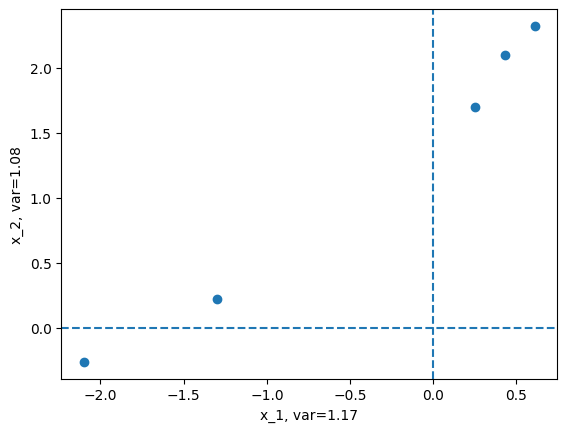

In [81]:
plt.scatter(x = x_1, y = x_2)
plt.axhline(y = 0, linestyle = '--')
plt.axvline(x = 0, linestyle = '--')
plt.xlabel(f'x_1, var={var_x_1}')
plt.ylabel(f'x_2, var={var_x_2}');

In [82]:
pca = PCA()
pca.fit(A)

PCA()

In [83]:
A_transformed = pca.transform(A)
pc_1 = A_transformed[:, 0]
pc_2 = A_transformed[:, 1]

In [84]:
pc_1, pc_2

(array([-2.23252828, -1.32329118,  0.81979624,  1.22688485,  1.50913837]),
 array([ 0.1003867 , -0.10862983, -0.11736319,  0.04597347,  0.07963285]))

In [85]:
var_pc_1 = np.var(pc_1).round(2)
var_pc_2 = np.var(pc_2).round(2)
var_pc_1, var_pc_2

(2.24, 0.01)

In [86]:
np.mean(pc_1), np.mean(pc_2)

(-4.4408920985006264e-17, 4.4408920985006264e-17)

(-1.0, 1.0)

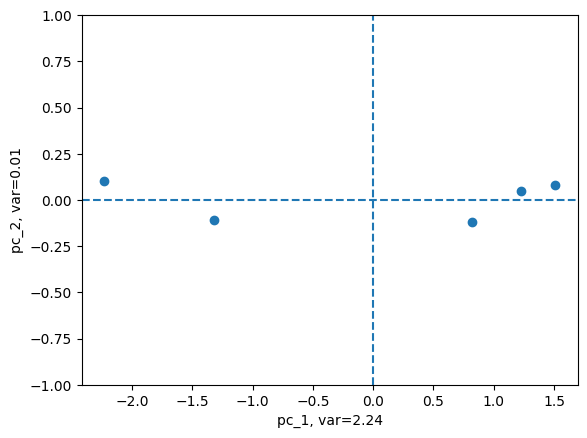

In [91]:
plt.scatter(x=pc_1, y=pc_2)
plt.axhline(y=0, linestyle='--')
plt.axvline(x=0, linestyle='--')
plt.xlabel(f'pc_1, var={var_pc_1}')
plt.ylabel(f'pc_2, var={var_pc_2}');
#limite y de -1 a 1
plt.ylim(-1, 1)

In [92]:
lr = LinearRegression()
lr.fit(X = pc_1.reshape(-1, 1), y = pc_2)
lr.coef_, lr.intercept_

(array([-8.297235e-18]), 4.4408920985006264e-17)

In [93]:
pca.mean_

array([-0.422,  1.216])

In [94]:
pca.explained_variance_

array([2.79752325, 0.01102675])

In [95]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.99607386, 0.00392614]), 1.0)